In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')

In [7]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
df.describe(include = 'all')

,Month,Passengers
count,144,144.000000
unique,144,NaN
top,1952-08,NaN
freq,1,NaN
mean,NaN,280.298611
std,NaN,119.966317
min,NaN,104.000000
25%,NaN,180.000000
50%,NaN,265.500000
75%,NaN,360.500000


In [8]:
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace = True)

df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


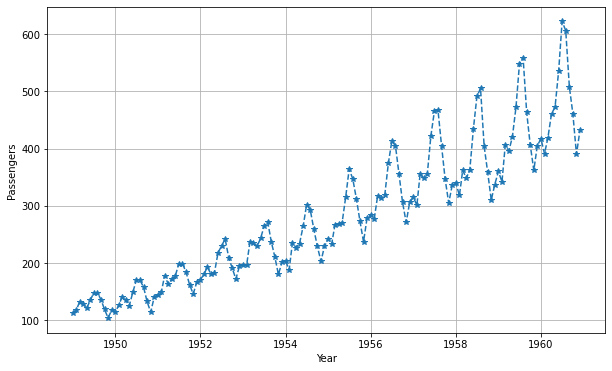

In [9]:
plt.figure(figsize = (10, 6))
plt.plot(df.index, df.Passengers, '--', marker = '*')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Passengers');

In [10]:
df.isnull().values.any()

False

In [14]:
df_copy = df.copy()
rows = df_copy.sample(frac = 0.01, random_state = 0)
rows['Passengers'] = np.nan

In [18]:
df_copy.loc[rows.index, 'Passengers'] = rows['Passengers']
df_copy.isnull().sum()

Passengers    1
dtype: int64

In [19]:
df_copy_ffill = df_copy.fillna(method = 'ffill')
df_copy_ffill.isnull().sum()

Passengers    0
dtype: int64

In [20]:
df_copy_bfill = df_copy.fillna(method = 'bfill')
df_copy_bfill.isnull().sum()

Passengers    0
dtype: int64

In [21]:
df_copy_LIF = df_copy.interpolate(method = 'linear', limit_direction = 'forward')
df_copy_LIF.isnull().sum()

Passengers    0
dtype: int64

In [22]:
df_copy_LIB = df_copy.interpolate(method = 'linear', limit_direction = 'backward')
df_copy_LIB.isnull().sum()

Passengers    0
dtype: int64

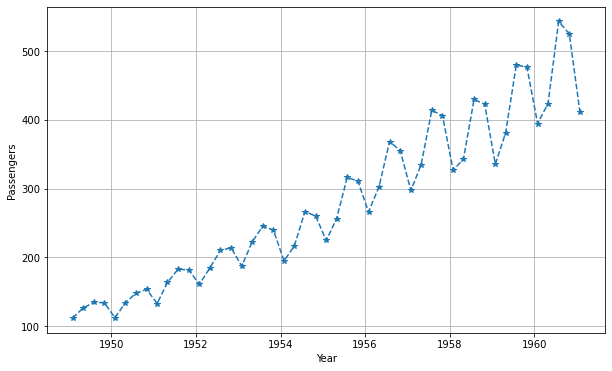

In [23]:
#Downsampling
df_quaterly = df.resample('3M').mean()

plt.figure(figsize = (10, 6))
plt.plot(df_quaterly.index, df_quaterly.Passengers, '--', marker = '*')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Passengers');

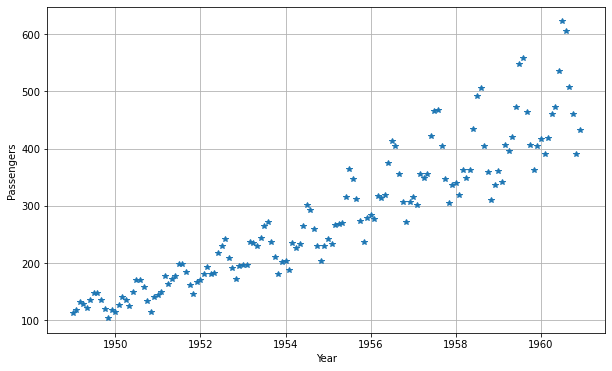

In [24]:
#Upsampling
df_daily = df.resample('D').mean()

plt.figure(figsize = (10, 6))
plt.plot(df_daily.index, df_daily.Passengers, '--', marker = '*')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Passengers');

In [25]:
df_MA = df.copy()
MA = df_MA['Passengers'].rolling(12).mean()

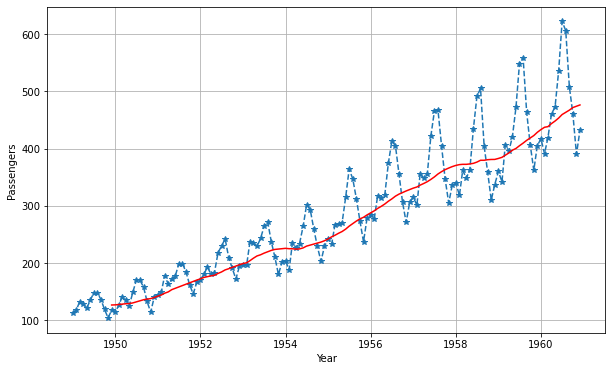

In [27]:
plt.figure(figsize = (10, 6))

plt.plot(df_MA.index, df_MA.Passengers, '--', marker = '*')
plt.plot(MA, '-', c = 'red')

plt.grid()
plt.xlabel('Year')
plt.ylabel('Passengers');

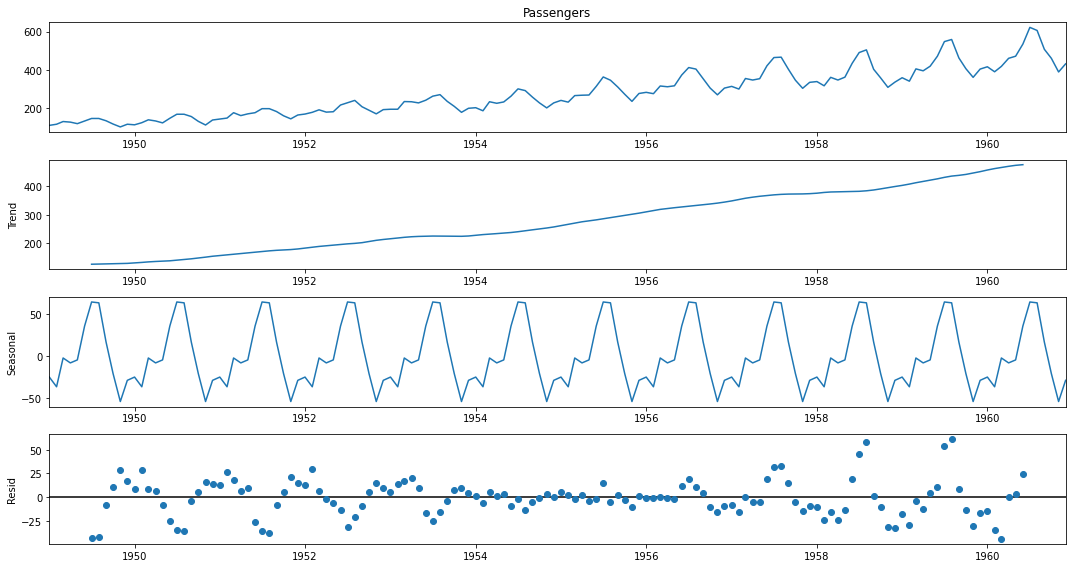

In [33]:
import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(df['Passengers'], model = 'additive')
decompose_series.plot()

plt.show()

In [37]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df['Passengers'])

print(f'ADF Statistics: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No of lags used: {adf_result[2]}')
print(f'No of observations used: {adf_result[3]}')

print('Critical Values:')
for k, v in adf_result[4].items():
    print(f'   {k}: {v}')

ADF Statistics: 0.8153688792060348
p-value: 0.9918802434376408
No of lags used: 13
No of observations used: 130
Critical Values:
   1%: -3.4816817173418295
   5%: -2.8840418343195267
   10%: -2.578770059171598


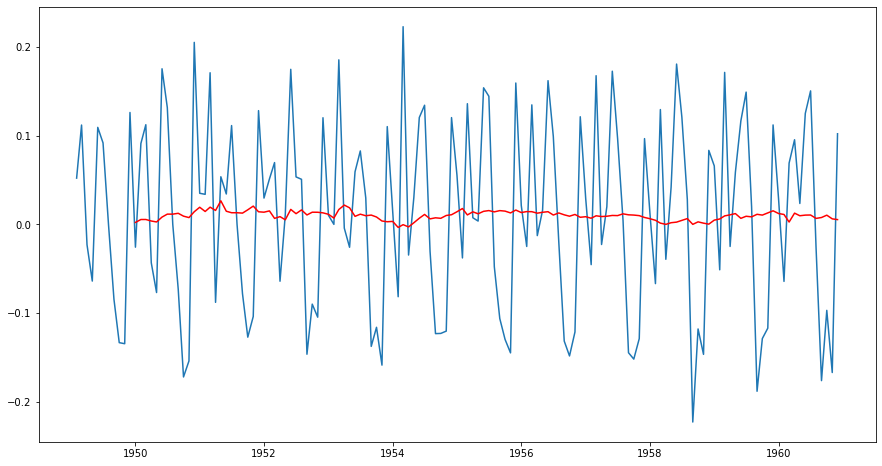

In [38]:
df_log = np.log(df)
df_diff = df_log.diff(periods = 1)

plt.plot(df_diff.index, df_diff.Passengers, '-')
plt.plot(df_diff.rolling(12).mean(), c = 'red');